In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv("C:/Users/Dayakar Reddy Sura/Downloads/Alphabets_data.csv")
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
data.shape

(20000, 17)

In [7]:
data[data.duplicated(keep=False)]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
22,S,3,2,3,3,2,8,8,7,5,7,5,7,2,8,9,8
37,P,3,6,4,4,2,4,14,8,1,11,6,3,0,10,4,8
51,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
60,N,3,3,3,5,2,7,7,13,2,5,6,8,5,8,0,8
67,E,2,3,3,2,2,7,7,5,7,7,6,8,2,8,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [8]:
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

<Axes: ylabel='Frequency'>

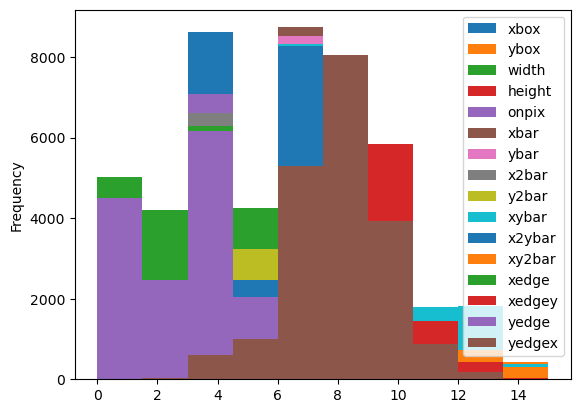

In [9]:
data.plot(kind='hist')

In [10]:
data1=data.drop_duplicates()

In [11]:
data1[data1.duplicated(keep=False)]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex


<Axes: >

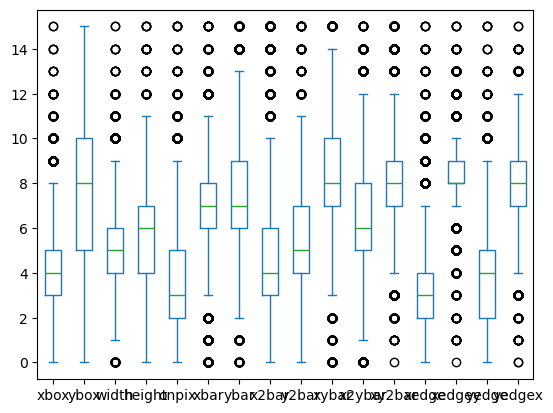

In [12]:
data1.plot(kind='box')

In [13]:
data1.letter.value_counts()

P    782
U    768
D    760
Q    760
A    756
F    752
T    748
Y    746
G    743
R    737
M    732
B    730
S    729
W    726
E    725
O    718
K    718
J    715
C    710
V    706
H    704
N    688
X    678
L    673
Z    640
I    524
Name: letter, dtype: int64

<Axes: >

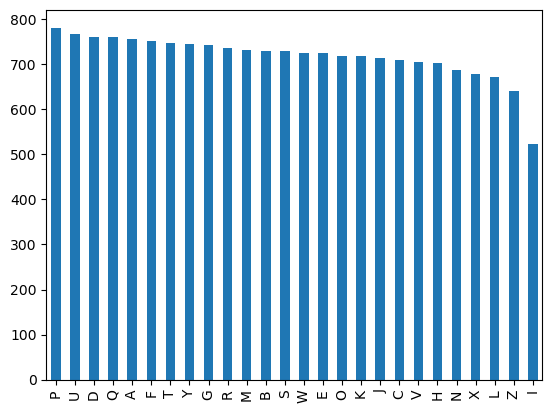

In [14]:
data1['letter'].value_counts().plot(kind='bar')

In [15]:
data1.xbox.value_counts()

4     4325
3     3901
5     3097
2     2577
6     1873
7     1002
1      855
8      510
9      284
10     121
11      48
0       46
12      20
13       4
14       3
15       2
Name: xbox, dtype: int64

<Axes: >

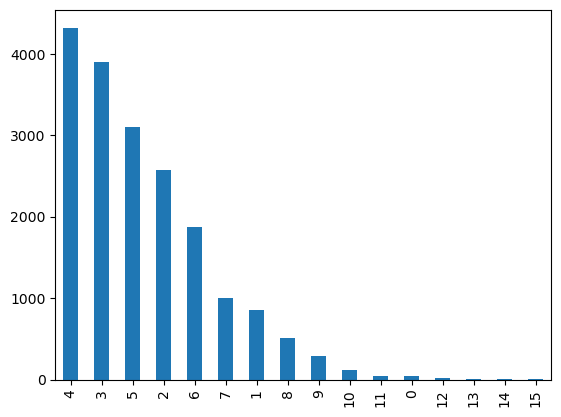

In [16]:
data1['xbox'].value_counts().plot(kind='bar')

In [17]:
data1.ybox.value_counts()

9     2628
7     2211
10    2127
8     2093
6     1634
11    1583
5     1448
4     1217
3     1204
1      625
2      487
0      394
12     320
13     270
15     230
14     197
Name: ybox, dtype: int64

<Axes: >

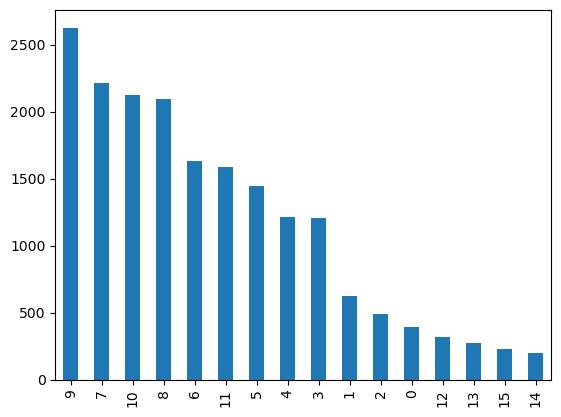

In [18]:
data1['ybox'].value_counts().plot(kind='bar')

In [19]:
data1.width.value_counts()

5     4126
6     3558
4     3531
7     1931
3     1809
8     1411
2      945
9      676
1      254
10     237
11      91
0       48
12      39
13       6
14       4
15       2
Name: width, dtype: int64

<Axes: >

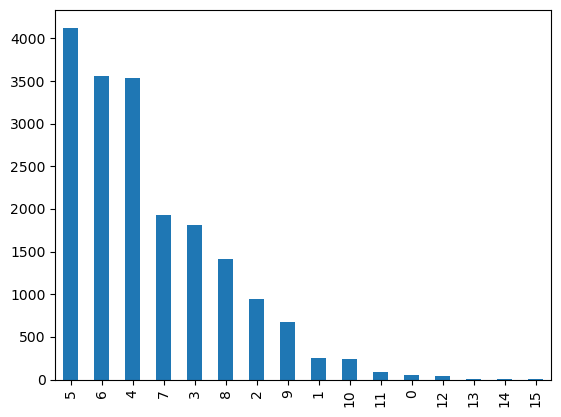

In [20]:
data1['width'].value_counts().plot(kind='bar')

In [21]:
data1.height.value_counts()

6     3500
8     3443
7     2608
5     2564
4     2543
3     1433
2     1162
1      627
9      347
0      202
10     103
11      76
12      31
14      15
13      10
15       4
Name: height, dtype: int64

<Axes: >

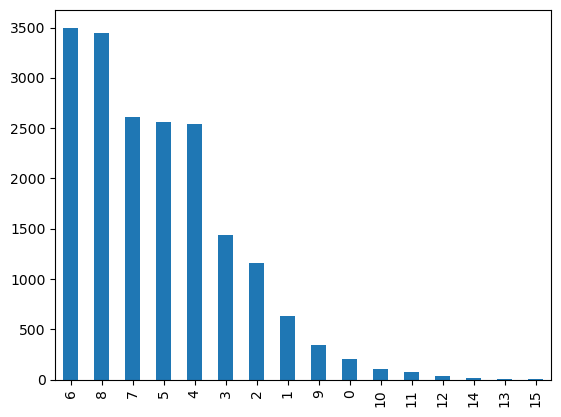

In [22]:
data1['height'].value_counts().plot(kind='bar')

In [23]:
data1.onpix.value_counts()

2     3848
3     3792
4     3111
5     2142
1     2013
6     1377
7      854
8      516
0      440
9      283
10     141
11      85
12      40
13      13
14       7
15       6
Name: onpix, dtype: int64

<Axes: >

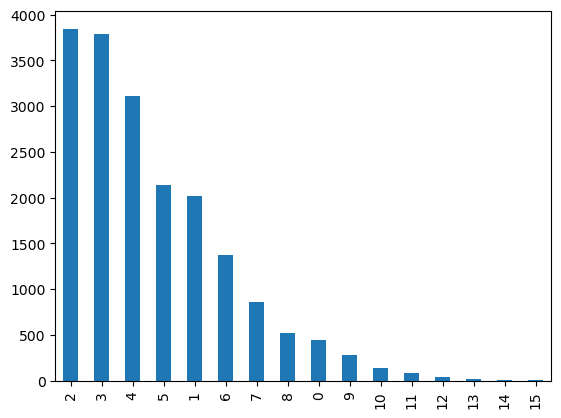

In [24]:
data1['onpix'].value_counts().plot(kind='bar')

In [25]:
data1.xbar.value_counts()

7     5210
8     3868
6     2627
5     1722
9     1722
4     1022
10     790
3      643
11     331
12     184
1      169
2      149
0      109
13      67
14      42
15      13
Name: xbar, dtype: int64

<Axes: >

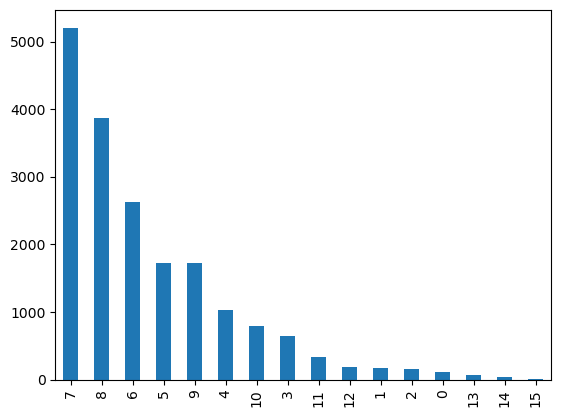

In [26]:
data1['xbar'].value_counts().plot(kind='bar')

In [27]:
data1.ybar.value_counts()

7     5260
8     3634
6     2412
9     1555
10    1205
11    1087
5      856
4      658
12     630
3      471
2      373
13     186
14     144
1       93
15      69
0       35
Name: ybar, dtype: int64

<Axes: >

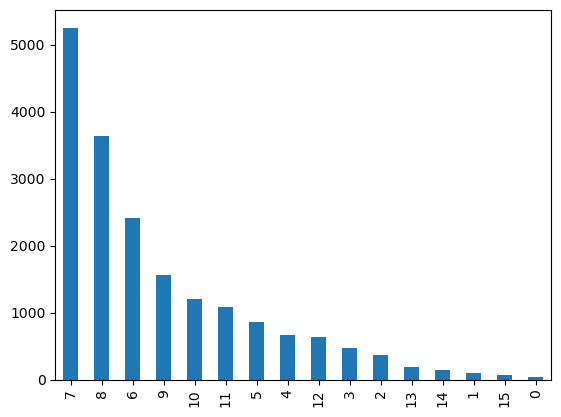

In [28]:
data1['ybar'].value_counts().plot(kind='bar')

In [29]:
data1.x2bar.value_counts()

3     3306
4     2863
5     2816
2     2587
6     2185
7     1344
1     1001
8      988
9      417
0      361
10     204
14     133
12     129
11     115
15     112
13     107
Name: x2bar, dtype: int64

<Axes: ylabel='Frequency'>

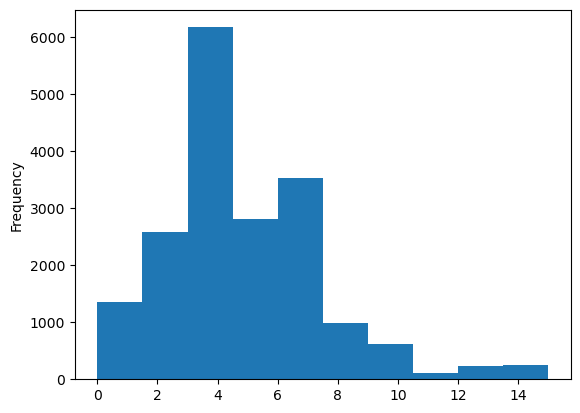

In [30]:
data1.x2bar.plot(kind='hist')

<Axes: >

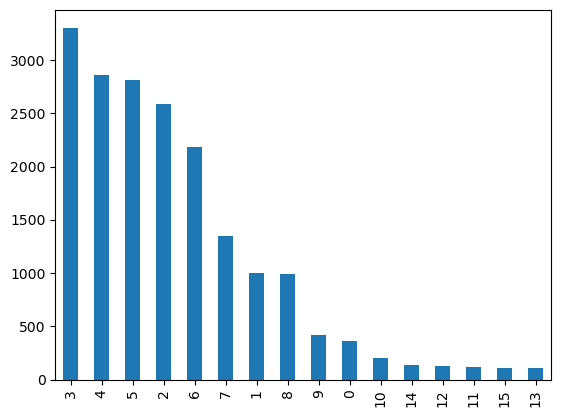

In [31]:
data1['x2bar'].value_counts().plot(kind='bar')

In [32]:
data1.y2bar.value_counts()

5     3136
6     2955
4     2699
7     2468
3     1825
2     1692
8     1615
9      836
1      727
10     293
0      201
11     117
12      42
14      26
13      19
15      17
Name: y2bar, dtype: int64

<Axes: >

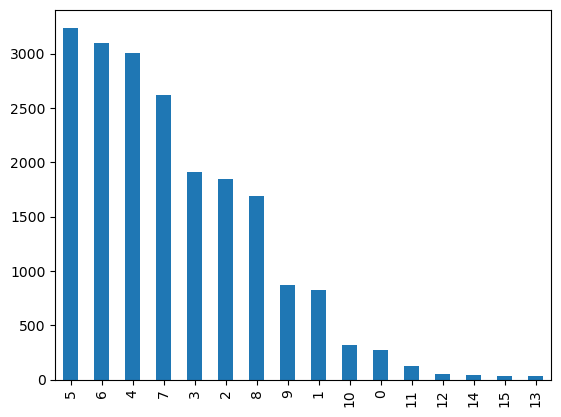

In [33]:
data['y2bar'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

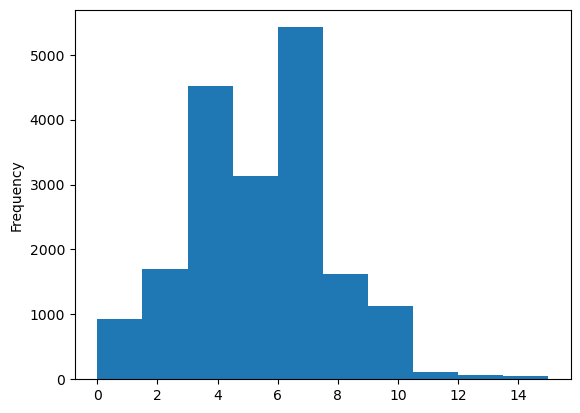

In [34]:
data1.y2bar.plot(kind='hist')

In [35]:
data1.xybar.value_counts()

7     4900
6     2627
10    2489
9     1871
11    1739
8     1623
12    1013
5      755
13     726
14     270
4      234
15      96
2       93
0       90
3       90
1       52
Name: xybar, dtype: int64

<Axes: >

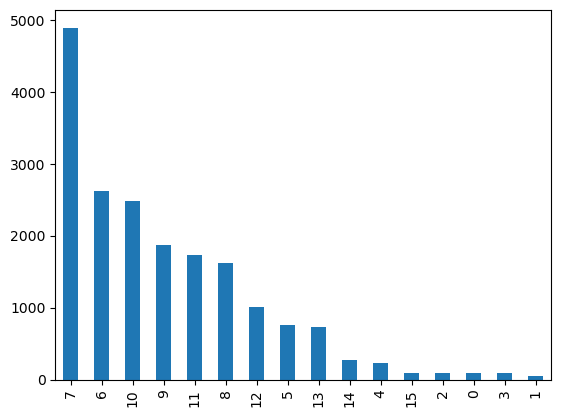

In [36]:
data1['xybar'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

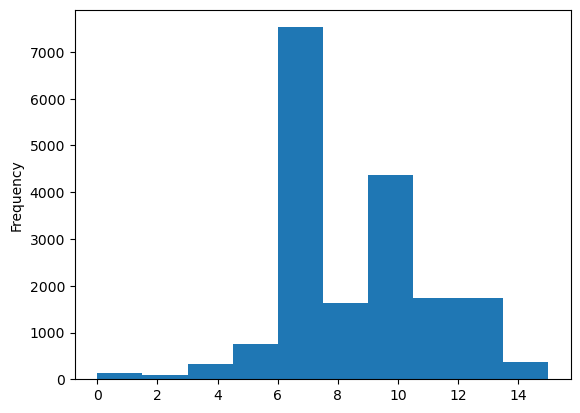

In [37]:
data1.xybar.plot(kind='hist')

In [38]:
data1.x2ybar.value_counts()

6     4914
7     2554
5     2391
4     1454
8     1440
9     1335
11     893
10     855
2      829
3      717
12     425
1      403
13     169
0      154
14     116
15      19
Name: x2ybar, dtype: int64

<Axes: >

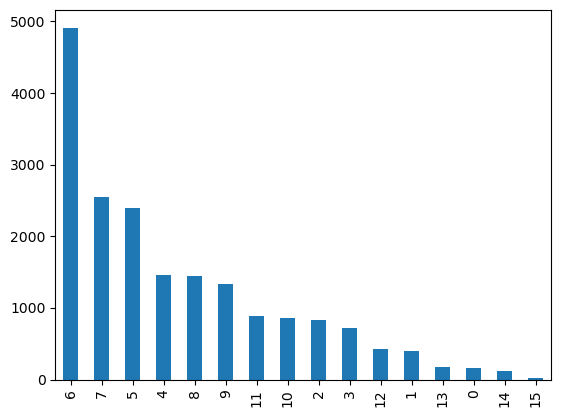

In [39]:
data1['x2ybar'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

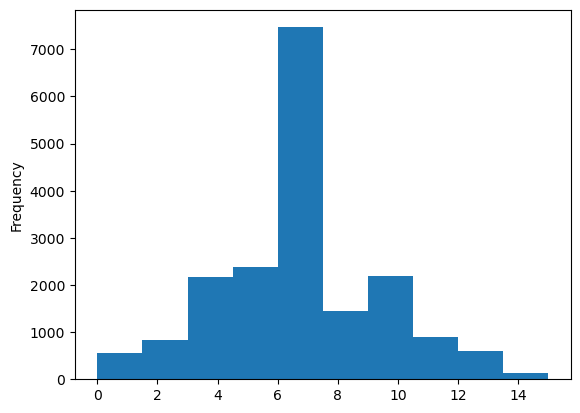

In [40]:
data1.x2ybar.plot(kind='hist')

In [41]:
data1.xy2bar.value_counts()

8     5689
9     2931
7     2707
6     1790
10    1390
5     1285
11     892
4      669
12     401
13     294
3      266
14     200
15      78
2       66
1        9
0        1
Name: xy2bar, dtype: int64

<Axes: >

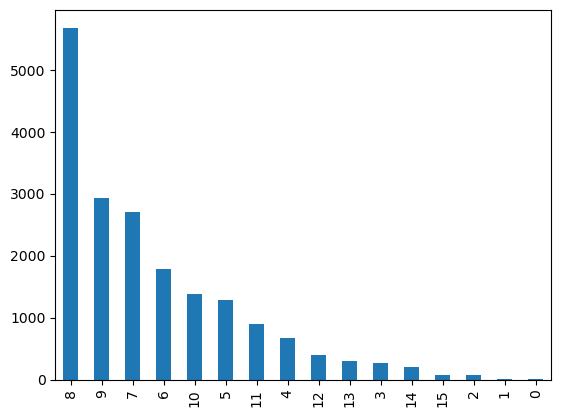

In [42]:
data1['xy2bar'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

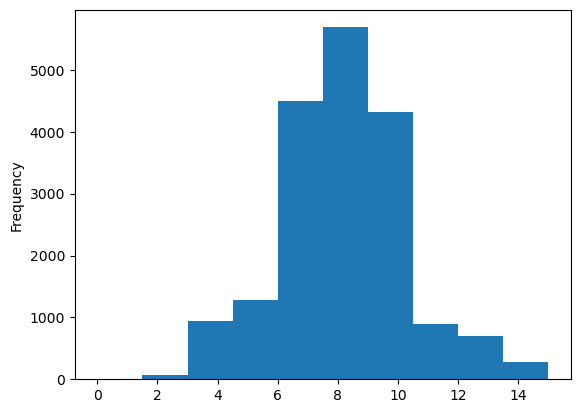

In [43]:
data1.xy2bar.plot(kind='hist')

In [44]:
data1.xedge.value_counts()

3     4569
2     3945
1     2415
0     1946
4     1480
5     1324
6     1193
7      707
8      556
9      237
10     153
11      81
12      29
13      17
14      12
15       4
Name: xedge, dtype: int64

<Axes: >

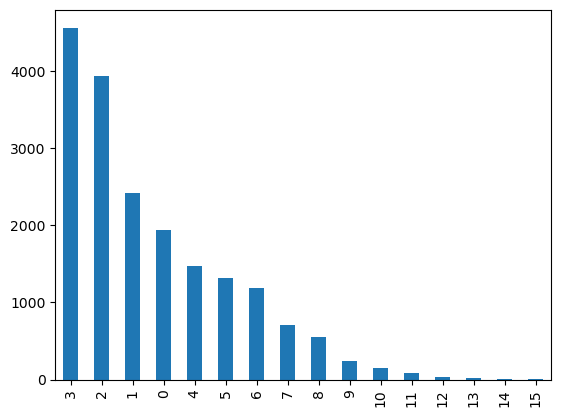

In [45]:
data1['xedge'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

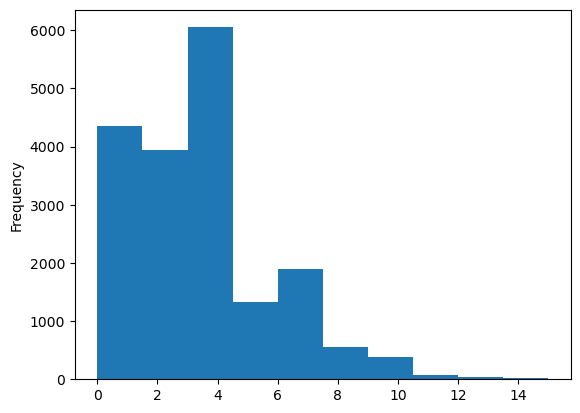

In [46]:
data1.xedge.plot(kind='hist')

In [47]:
data1.xedgey.value_counts()

8     6731
9     3337
7     2416
10    2303
6     1518
11    1372
5      408
12     347
4       79
13      72
3       34
2       17
14      16
1       13
15       4
0        1
Name: xedgey, dtype: int64

<Axes: >

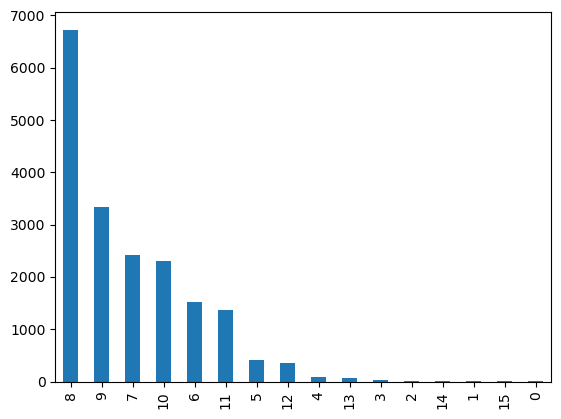

In [48]:
data1['xedgey'].value_counts().plot(kind='bar')

In [49]:
data1.yedge.value_counts()

3     2937
4     2922
2     2336
5     1997
1     1927
0     1921
6     1673
7     1179
8      915
9      603
10     152
11      64
12      22
13      13
15       4
14       3
Name: yedge, dtype: int64

<Axes: >

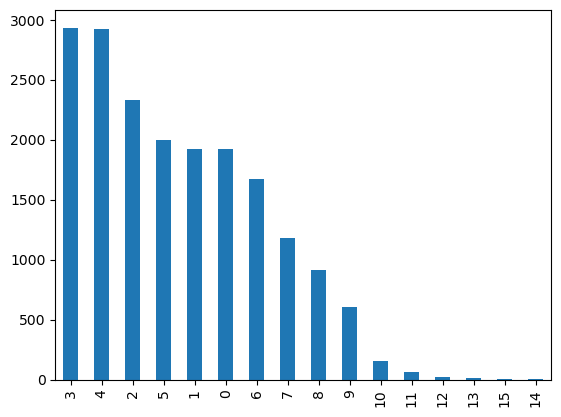

In [50]:
data1['yedge'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

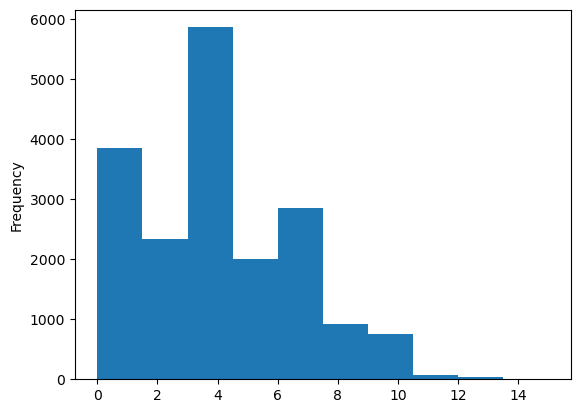

In [51]:
data1.yedge.plot(kind='hist')

In [52]:
data1.yedgex.value_counts()

8     7010
7     3376
9     2305
6     1800
10    1502
5      973
11     847
4      475
12     137
3      130
13      49
2       30
1       17
14      13
15       2
0        2
Name: yedgex, dtype: int64

<Axes: >

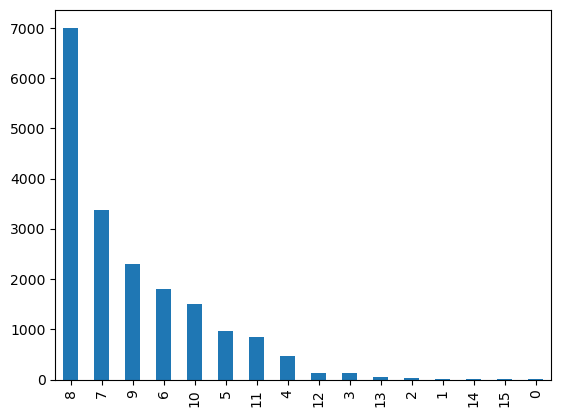

In [53]:
data1['yedgex'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

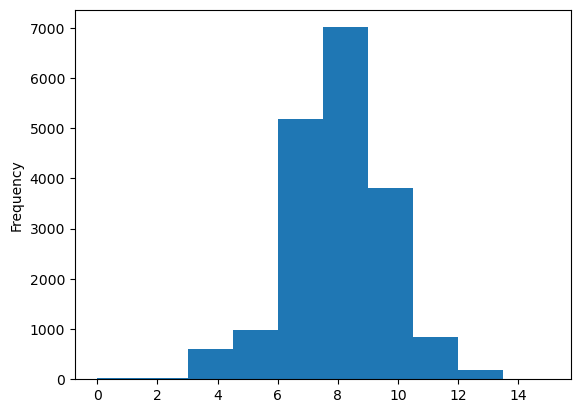

In [54]:
data1.yedgex.plot(kind='hist')

In [55]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data1.columns:
    if data1[col].dtype == 'object':
        data1[col] = labelencoder.fit_transform(data1[col])
data1

C:\Users\Dayakar Reddy Sura\AppData\Local\Temp\ipykernel_9704\3218699090.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col] = labelencoder.fit_transform(data1[col])


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,19,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [56]:
array=data1.values

In [57]:
x=array[:,1:]
y=array[:,0]

In [58]:
'''from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y1=label.fit(y)'''

'from sklearn.preprocessing import LabelEncoder\nlabel=LabelEncoder()\ny1=label.fit(y)'

In [59]:
y

array([19,  8,  3, ...,  2, 19,  0], dtype=int64)

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=16)

In [61]:
x_train.shape

(14934, 16)

### Model Building

In [62]:
model=Sequential()
model.add(Dense(20,input_dim=16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
h=model.fit(x,y,validation_split=0.1,epochs=50,batch_size=10)

Epoch 1/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0408 - loss: -7930.7866 - val_accuracy: 0.0364 - val_loss: -65732.6797
Epoch 2/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0400 - loss: -99367.8594 - val_accuracy: 0.0364 - val_loss: -227523.4844
Epoch 3/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0391 - loss: -276910.3125 - val_accuracy: 0.0364 - val_loss: -461238.7188
Epoch 4/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0388 - loss: -524558.8750 - val_accuracy: 0.0364 - val_loss: -757747.0000
Epoch 5/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0392 - loss: -837504.7500 - val_accuracy: 0.0364 - val_loss: -1114138.3750
Epoch 6/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0390 - loss: -1206807.6250 - val_accuracy: 0.0364 - val_loss: -1530060.0000
Epoch 7/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0394 - loss: -1630632.0000 - val_accuracy: 0.0364 - val_loss: -2005719.6250
Epoch

#### Here using less epochs and batch size because running problem 

In [66]:
scores=model.evaluate(x,y)
print("%s: %.2f%%" %(model.metrics_names[1],scores[1]*100))

584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0406 - loss: -74014952.0000
compile_metrics: 3.91%


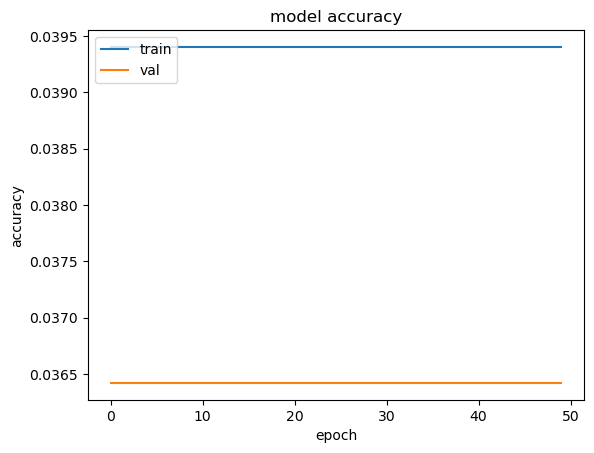

In [67]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()      

In [68]:
#Predictions for test data

In [69]:
score=model.evaluate(x_test,y_test)
print("%s: %.2f%%" % (model.metrics_names[1],score[1]*100))

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0411 - loss: -76532160.0000
compile_metrics: 4.07%


##### using more layears

In [70]:
model1=Sequential()
model1.add(Dense(40,input_dim=16,activation='relu'))
model1.add(Dense(20,activation='relu'))
model1.add(Dense(10,activation='relu'))
model1.add(Dense(5,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [71]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [72]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 40)                  │             680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,771 (6.92 KB)

 Trainable params: 1,771 (6.92 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
h1=model1.fit(x,y,validation_split=0.2,epochs=100,batch_size=100)

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0408 - loss: -342.0787 - val_accuracy: 0.0348 - val_loss: -12973.3164
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0389 - loss: -70113.5078 - val_accuracy: 0.0348 - val_loss: -661100.3750
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0426 - loss: -1441118.2500 - val_accuracy: 0.0348 - val_loss: -6182265.5000
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0404 - loss: -9941094.0000 - val_accuracy: 0.0348 - val_loss: -28421858.0000
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0405 - loss: -39291444.0000 - val_accuracy: 0.0348 - val_loss: -88880744.0000
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0400 - loss: -113454096.0000 - val_accuracy: 0.0348 - val_loss: -220132336.0000
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0400 - loss: -270203136.0000 - val_accuracy: 0.0348 - val_loss: -463817056.00

In [74]:
scores=model1.evaluate(x,y)
print("%s: %.2f%%" %(model.metrics_names[1],scores[1]*100))

584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0406 - loss: -24117107490816.0000
compile_metrics: 3.91%


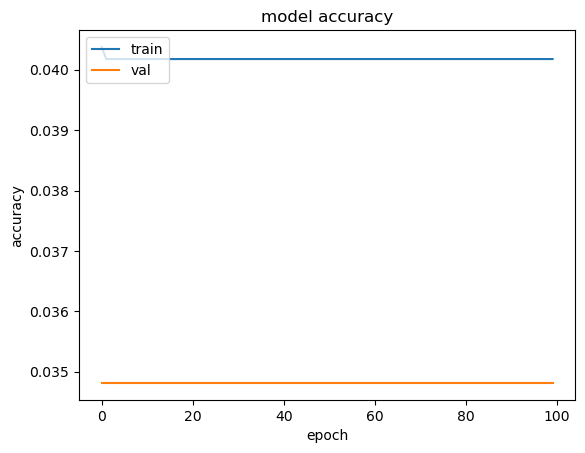

In [75]:
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()      

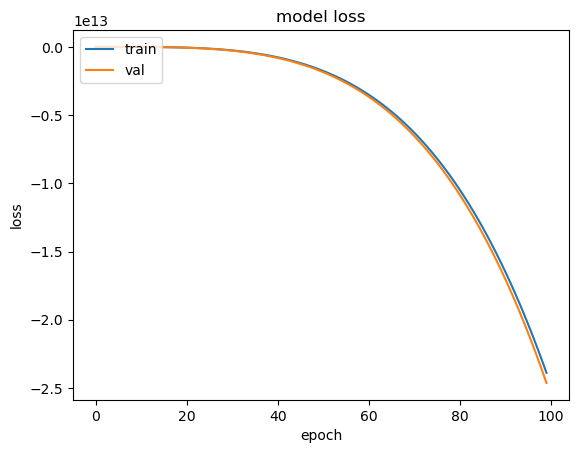

In [76]:
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

##### Using Stochastic Gradient Descent (SGD)

In [77]:
model1.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [78]:
hsgd=model1.fit(x,y,validation_split=0.2,epochs=100,batch_size=100)

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0402 - loss: nan - val_accuracy: 0.0399 - val_loss: nan
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0398 - loss: nan - val_accuracy: 0.0399 - val_loss: nan
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0432 - loss: nan - val_accuracy: 0.0399 - val_loss: nan
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0435 - loss: nan - val_accuracy: 0.0399 - val_loss: nan
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0396 - loss: nan - val_accuracy: 0.0399 - val_loss: nan
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0406 - loss: nan - val_accuracy: 0.0399 - val_loss: nan
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0428 - loss: nan - val_accuracy: 0.0399 - val_loss: nan
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0376 - loss: nan - val_accuracy: 0.0399 - val_loss: nan
Epoch 9/100
150/

In [79]:
scores1=model1.evaluate(x_test,y_test)
print("%s: %.2f%%" %(model.metrics_names[1],scores1[1]*100))

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0362 - loss: nan 
compile_metrics: 3.51%


##### Using adamax

In [80]:
model2=Sequential()
model2.add(Dense(60,input_dim=16,activation='relu'))
model2.add(Dense(30,activation='relu'))
model2.add(Dense(10,activation='relu'))
model2.add(Dense(5,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

In [81]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 60)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,221 (12.58 KB)

 Trainable params: 3,221 (12.58 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model2.compile(loss='binary_crossentropy',optimizer='adamax',metrics=['accuracy'])

In [83]:
h2=model2.fit(x,y,validation_split=0.1,epochs=100,batch_size=100)

Epoch 1/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0393 - loss: -87.0351 - val_accuracy: 0.0364 - val_loss: -1412.5526
Epoch 2/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0421 - loss: -3678.4385 - val_accuracy: 0.0364 - val_loss: -19239.0430
Epoch 3/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0403 - loss: -33111.1523 - val_accuracy: 0.0364 - val_loss: -106339.6875
Epoch 4/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0389 - loss: -154322.0156 - val_accuracy: 0.0364 - val_loss: -376996.5312
Epoch 5/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0383 - loss: -499749.0938 - val_accuracy: 0.0364 - val_loss: -1042130.4375
Epoch 6/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0361 - loss: -1296679.8750 - val_accuracy: 0.0364 - val_loss: -2380540.2500
Epoch 7/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0358 - loss: -2739311.2500 - val_accuracy: 0.0364 - val_loss: -4350209.0000
Epoch 8/100
169/16

In [84]:
scores2=model2.evaluate(x_test,y_test)
print("%s: %.2f%%" %(model.metrics_names[1],scores1[1]*100))

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0411 - loss: -992476004352.0000
compile_metrics: 3.51%


### Hypermeter tuning

In [85]:
#!pip install tensorflow scikit-learn

In [86]:
#!pip install tensorflow keras scikit-learn

In [87]:
#pip install keras scikit-learn

In [88]:
#pip install scikeras

In [89]:
from scikeras.wrappers import KerasRegressor

In [90]:
import keras as ke
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV,KFold
from keras.optimizers import Adam




In [91]:
from scikeras.wrappers import KerasClassifier


In [92]:
x=data1.iloc[:,1:]
y=data1.iloc[:,0]

In [93]:
a=StandardScaler()
a.fit(x)

StandardScaler()

In [94]:
x_stand=a.transform(x)

In [95]:
def create_model():
    model4=Sequential(name='Hypterparameter-Tuning-Dummy')
    model4.add(Dense(34,input_dim=16,kernel_initializer='uniform',activation='relu'))
    model4.add(Dense(17,kernel_initializer='uniform',activation='relu'))
    model4.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    adam=Adam(learning_rate=0.01)
    model4.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
    return model4

In [96]:
model4=KerasClassifier(build_fn=create_model,verbose=10)

In [97]:
batch_size=[20]
epochs=[20]

In [124]:
param_grid=dict(batch_size=batch_size,epochs=epochs)

In [125]:
grid=GridSearchCV(estimator=model4,param_grid=param_grid,cv=KFold(),verbose=10)


In [126]:
grid_results=grid.fit(x_stand,y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START batch_size=20, epochs=20....................................
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
[CV 1/5; 1/1] END .....batch_size=20, epochs=20;, score=0.042 total time=  36.3s
[CV 2/5; 1/1] START batch_size=20, epochs=20....................................
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
[CV 2/5; 1/1] END .....batch_size=20, epochs=20;, score=0.038 total time=  38.0s
[CV 3/5; 1/1] START batch_size=20, epochs=20....................................
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/

In [127]:
print('Best{},using {}'.format(grid_results.best_score_,grid_results.best_params_))

Best0.04049727448597183,using {'batch_size': 20, 'epochs': 20}


In [106]:
means=grid_results.cv_results_['mean_test_score']

NameError: name 'grid_results' is not defined

In [103]:
std=grid_results.cv_results_['std_test_score']

In [104]:
params=grid_results.cv_results_['params']

In [105]:
for means,stder,param in zip(means,std,params):
    print('{},{} with:{}'.format(means,stder,param))

NameError: name 'means' is not defined

#### Activation function and kernel initializer

In [107]:
from keras.layers import Dropout

In [108]:
def create_model1(activation_function,init):
    model5=Sequential()
    model5.add(Dense(20,input_dim=16,kernel_initializer=init,activation=activation_function))
    model5.add(Dropout(0.1))
    model5.add(Dense(10,kernel_initializer=init,activation=activation_function))
    model5.add(Dropout(0.1))
    model5.add(Dense(1,activation='sigmoid'))
    adam=Adam(learning_rate=0.01)
    model5.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
    return model5

In [109]:
model5=KerasClassifier(build_fn=create_model1,verbose=1,batch_size=10,epochs=10,activation_function=['softmax','relu','linear'],init=['uniform','normal','zero'])

In [110]:
activation_function=['softmax','relu','linear']
init=['uniform','normal','zero']

In [111]:
param_grids=dict(activation_function=activation_function,init=init)

In [ ]:
#grid1=GridSearchCV(estimator=model5,param_grid=param_grids,cv=KFold(),verbose=10)
#grid_results=grid1.fit(x_stand,y)

#### Learning rate and Dropout rate

In [112]:
from keras.layers import Dropout

In [113]:
def create_model1(learning_rate,dropout_rate):
    model5=Sequential()
    model5.add(Dense(20,input_dim=16,kernel_initializer='normal',activation='relu'))
    model5.add(Dropout(dropout_rate))
    model5.add(Dense(10,kernel_initializer='normal',activation='relu'))
    model5.add(Dropout(dropout_rate))
    model5.add(Dense(1,activation='sigmoid'))
    adam=Adam(learning_rate=learning_rate)
    model5.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
    return model5

In [114]:
model5=KerasClassifier(build_fn=create_model1,verbose=1,batch_size=10,epochs=10,learning_rate=[0.001,0.01,0.1],dropout_rate=[0.1,0.1,0.2])

In [115]:
learning_rate=[0.001,0.01,0.1]
dropout_rate=[0.1,0.1,0.2]

In [116]:
param_grid1= dict(learning_rate =  learning_rate,dropout_rate=dropout_rate)

In [ ]:
#grid1=GridSearchCV(estimator=model5,param_grid=param_grid1,cv=KFold(),verbose=10)
#grid_results1=grid1.fit(x_stand,y)

In [117]:
from sklearn.metrics import classification_report,accuracy_score

In [118]:
def create_model3():
    model6=Sequential()
    model6.add(Dense(20,input_dim=16,kernel_initializer='uniform',activation='tanh'))
    model6.add(Dropout(0.1))
    model6.add(Dense(10,kernel_initializer='uniform',activation='tanh'))
    model6.add(Dropout(0.1))
    model6.add(Dense(1,activation='sigmoid'))

    adam=Adam(learning_rate=0.01)
    model6.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
    return model6

In [119]:
model6=KerasClassifier(build_fn=create_model3,verbose=0,batch_size=10,epochs=10)

In [120]:
model6.fit(x_stand,y)

KerasClassifier(
	model=None
	build_fn=<function create_model3 at 0x000002848958AFC0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [121]:
y_predict=model6.predict(x_stand)
#predictions_series = pd.Series(y_predict)

In [122]:
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.04      1.00      0.08       756
           1       0.00      0.00      0.00       730
           2       0.00      0.00      0.00       710
           3       0.00      0.00      0.00       760
           4       0.00      0.00      0.00       725
           5       0.00      0.00      0.00       752
           6       0.00      0.00      0.00       743
           7       0.00      0.00      0.00       704
           8       0.00      0.00      0.00       524
           9       0.00      0.00      0.00       715
          10       0.00      0.00      0.00       718
          11       0.00      0.00      0.00       673
          12       0.00      0.00      0.00       732
          13       0.00      0.00      0.00       688
          14       0.00      0.00      0.00       718
          15       0.00      0.00      0.00       782
          16       0.00      0.00      0.00       760
          17       0.00    

In [123]:
accuracylg1=accuracy_score(y,y_predict)
print("Accuracy:%2f%%"%(accuracylg1*100))

Accuracy:4.049711%


This report presents an end-to-end methodology for collecting datasets to recognize handwritten English alphabets in the Indian context by utilizing Inertial Measurement Units (IMUs) and leveraging the diversity present in the Indian writing style. The IMUs are utilized to capture the dynamic movement patterns associated with handwriting, enabling more accurate recognition of alphabets. The Indian context introduces various challenges due to the heterogeneity in writing styles across different regions and languages. By leveraging this diversity, the collected dataset and the collection system aim to achieve higher recognition accuracy